In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [32]:
def sci_notation(number):
    ret_string = f'{float(number):0.0e}'
    a, b = ret_string.split("e")
    # remove leading "+" and strip leading zeros
    b = int(b)
    return f'{a} x 10^{{{str(b)}}}'

print(sci_notation("0.00005"))

5 x 10^{-5}


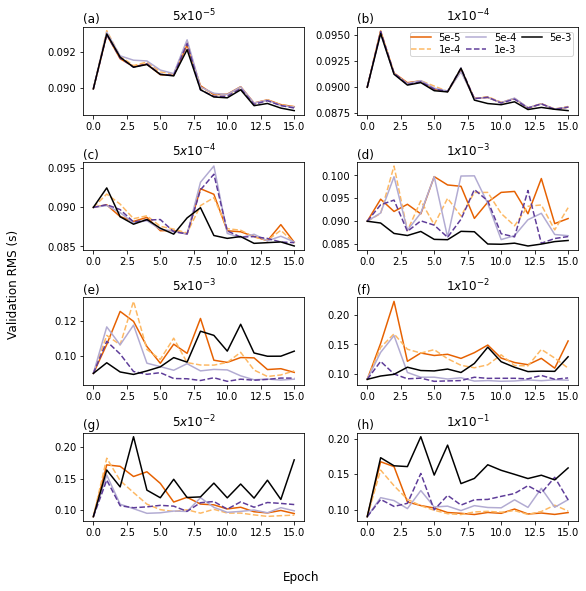

In [44]:
learning_rates = ["0.00005", "0.0001", "0.0005", "0.001", "0.005", "0.01", "0.05", "0.1"]
weight_decays = ["5e-5", "1e-4", "5e-4", "1e-3", "5e-3"]

fig, axes = plt.subplots(4, 2, figsize=(8, 8))
axes = axes.flatten()
cnt = 0

colors = ["#e66101", "#fdb863", "#b2abd2", "#5e3c99", "k"]
linestyles = ["-", "--", "-", "--", "-"]
for lr in learning_rates:
    #plt.figure()
    wd_cnt = 0
    for wd in weight_decays:
        dir_name = f"SGD_tuning/128_{lr}_{wd}_15"
        df = pd.read_csv(f"{dir_name}/train_metrics.csv")
        axes[cnt].plot(range(len(df)), df.va_rms[:], color=colors[wd_cnt], label=wd, 
                       linestyle=linestyles[wd_cnt]) #f"{float(wd):0.0E}")
        wd_cnt += 1
    #axes[cnt].legend(ncol=3) #, title="weight decay")
    axes[cnt].set_title(f'${sci_notation(lr)}$', fontsize=12)
    cnt += 1
    #plt.ylim([0.084, 0.1])
    
    
panels = ["(a)", "(b)", "(c)", "(d)", "(e)", "(f)", "(g)", "(h)"]
for i in range(len(axes)):
    axes[i].text(0, 1.04, panels[i], transform=axes[i].transAxes, fontsize=12)
    
axes[1].legend(ncol=3, columnspacing=0.5, borderpad=0.1, labelspacing=0.2)
fig.supylabel("Validation RMS (s)", x=-0.01, fontsize=12)
fig.supxlabel("Epoch", y=-0.02, fontsize=12)
fig.tight_layout()
fig.savefig('P_SGD_lr_wd_tune.png', dpi=300, bbox_inches='tight')


0.0867786257196163 28
0.0864877713319401 27
0.0846442594269922 27
0.0839868455218859 24
0.08518389757901 29
0.0846649266271383 12


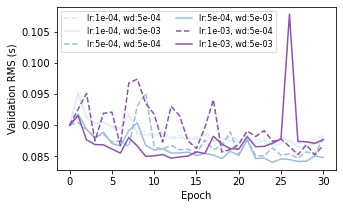

In [59]:
learning_rates = ["0.0001", "0.0005", "0.001"] #, "0.0002"] #, "0.05", "0.1"]
weight_decays = ["5e-4", "5e-3"]
# colors = ["#e66101", "#fdb863", "#b2abd2"]
colors = ["#e0ecf4", "#9ebcda", "#8856a7"]

lines = ["--", "-"]
plt.figure(figsize=(5, 3))    
color_cnt = 0
for lr in learning_rates:
    line_cnt = 0
    for wd in weight_decays:
        dir_name = f"SGD_tuning/128_{lr}_{wd}_30"
        df = pd.read_csv(f"{dir_name}/train_metrics.csv")
        print(np.min(df.va_rms[:]), np.argmin(df.va_rms[:]))
        plt.plot(range(len(df)), df.va_rms[:], label=f"lr:{float(lr):0.0e}, wd:{float(wd):0.0e}", color=colors[color_cnt], linestyle=lines[line_cnt])
        #f'${sci_notation(lr)}$,${sci_notation(wd)}$'
        line_cnt += 1
    color_cnt += 1
plt.legend(ncol=2, fontsize=8)
plt.ylabel("Validation RMS (s)", fontsize=10)
plt.xlabel("Epoch", fontsize=10)
    #plt.ylim([0.084, 0.1])
plt.savefig('P_sgd_tuning_30epochs.png', dpi=300, bbox_inches='tight')

In [60]:
# SWAG

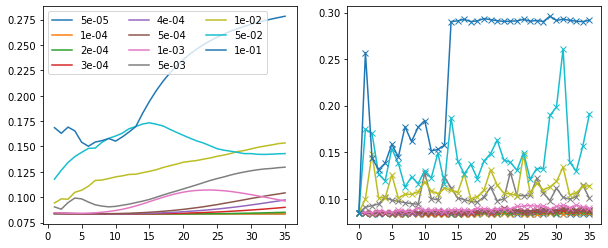

In [61]:
learing_rates = ["0.00005", "0.0001", "0.0002", "0.0003", "0.0004", "0.0005", "0.001", "0.005", "0.01",
                "0.05", "0.1"]
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
for lr in learing_rates:
    dir_name = f"SWAG_tune_lr/128_0.001_5e-3_{lr}_48_13_20"
    df = pd.read_csv(f"{dir_name}/train_metrics.csv")
    axes[0].plot(range(len(df)), df.swa_va_rms, label=f"{float(lr):0.0e}")
    axes[1].plot(range(len(df)), df.va_rms, label=f"{float(lr):0.0e}", marker="x")
axes[0].legend(ncol=3)


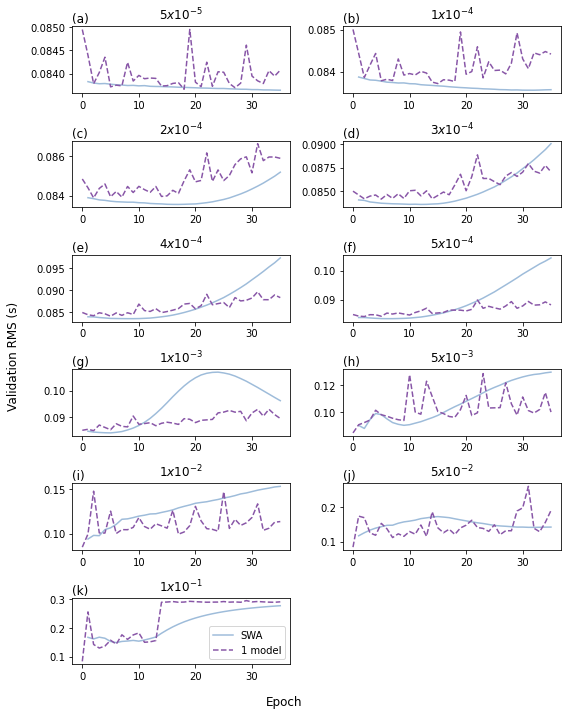

In [62]:
learing_rates = ["0.00005", "0.0001", "0.0002", "0.0003", "0.0004", "0.0005", "0.001", "0.005", "0.01",
                "0.05", "0.1"]
fig, axes = plt.subplots(6, 2, figsize=(8, 10))
axes = axes.flatten()
colors = ["#9ebcda", "#8856a7"]
for i, lr in enumerate(learing_rates):
    dir_name = f"SWAG_tune_lr/128_0.001_5e-3_{lr}_48_13_20"
    df = pd.read_csv(f"{dir_name}/train_metrics.csv")
    axes[i].plot( range(len(df)), df.swa_va_rms, marker=None, color=colors[0], label="SWA") #, label=f"{float(lr):0.0e}")
    axes[i].plot(range(len(df)), df.va_rms, marker=None, linestyle="--", color=colors[1], label="1 model")
    #axes[i].legend(ncol=3)
    axes[i].set_title(f"${sci_notation(lr)}$", fontsize=12)
    #axes[i].plot([0], [0.08495], marker="x", color="red")
    #axes[i].set_ylim(0.08, 0.3)

panels = ["(a)", "(b)", "(c)", "(d)", "(e)", "(f)", "(g)", "(h)", "(i)", "(j)", "(k)"]
for i in range(len(axes)-1):
    axes[i].text(0, 1.05, panels[i], transform=axes[i].transAxes, fontsize=12)
    
axes[-2].legend()
axes[-1].axis('off')
fig.supylabel("Validation RMS (s)", fontsize=12)
fig.supxlabel("Epoch", fontsize=12)
fig.tight_layout()
plt.savefig('P_SWAG_lr.png', dpi=300, bbox_inches='tight')

0.083623057540301 31
0.0836477325000391 16


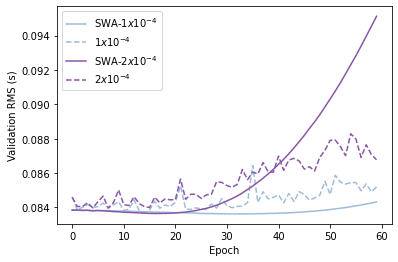

In [64]:
learing_rates = ["0.0001", "0.0002"]
colors = ["#9ebcda", "#8856a7"]
for i, lr in enumerate(learing_rates):
    dir_name = f"SWAG_tune_lr_ft24/128_0.0005_5e-3_{lr}_84_24_20"
    df = pd.read_csv(f"{dir_name}/train_metrics.csv")
    print(np.min(df.swa_va_rms), np.argmin(df.swa_va_rms))
    plt.plot(range(len(df)), df.swa_va_rms, label=f"SWA-${sci_notation(lr)}$", color=colors[i])
    plt.plot(range(len(df)), df.va_rms, label=f"${sci_notation(lr)}$", marker=None, linestyle="--", color=colors[i])

plt.legend()
plt.ylabel("Validation RMS (s)")
plt.xlabel("Epoch")
plt.savefig('P_SWAG_lr_60epochs.png', dpi=300, bbox_inches='tight')

In [64]:
df = pd.read_csv(file_name)
df

,i_residual_mean,i_residual_std,i_of_mean,i_of_std,i_rms,ens_residual_mean,ens_residual_std,ens_of_mean,ens_of_std,ens_rms
0,0.002221,0.095587,0.004182,0.071421,0.095613,0.002221,0.095587,0.004182,0.071421,0.095613
1,0.001960,0.094317,0.006658,0.063503,0.094337,0.002091,0.091354,0.005189,0.064954,0.091378
2,0.003063,0.091978,0.006171,0.061187,0.092029,0.002415,0.088484,0.006121,0.055026,0.088517
3,0.003235,0.086439,0.006545,0.051137,0.086499,0.002620,0.086671,0.006441,0.051666,0.086711
4,0.000500,0.087678,0.002780,0.050248,0.087680,0.002196,0.086203,0.005801,0.050405,0.086231
...,...,...,...,...,...,...,...,...,...,...
95,0.000698,0.091027,0.005078,0.059357,0.091029,0.002363,0.085457,0.006061,0.049937,0.085490
96,0.001529,0.095450,0.004710,0.061818,0.095463,0.002354,0.085478,0.006058,0.049949,0.085511
97,0.003656,0.091771,0.005754,0.066796,0.091844,0.002368,0.085449,0.006082,0.049862,0.085481
98,0.000412,0.113592,0.001796,0.105111,0.113593,0.002348,0.085515,0.006076,0.050139,0.085548


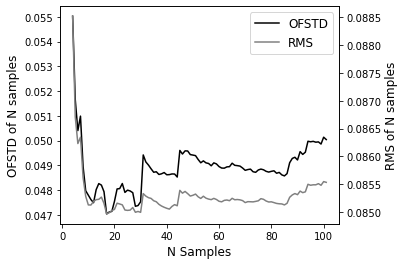

In [69]:
file_name = f"SWAG_tune_lr_ft24/128_0.0005_5e-3_0.0002_84_24_20/val_results_100/val_eval_swag-59_residual_summary_100.csv"
# colors = ["#9ebcda", "#8856a7"]
colors = ["k", "grey"]
# start at 3 samples
startN=3
df = pd.read_csv(file_name)
df = df.iloc[startN-1:]
fig, axes = plt.subplots(1, figsize=(5 ,4))
ln1 = axes.plot(np.arange(startN, len(df)+startN)+1, df.ens_of_std, color=colors[0], label="OFSTD")
axes1 = axes.twinx()
ln2 = axes1.plot(np.arange(startN, len(df)+startN)+1, df.ens_rms, color=colors[1], label="RMS")
axes.set_xlabel("N Samples", fontsize=12)
axes.set_ylabel("OFSTD of N samples", color=colors[0], fontsize=12)
axes1.set_ylabel("RMS of N samples", x=1.1, fontsize=12) #, color=colors[1])
lns = ln1 + ln2 
labs = [l.get_label() for l in lns]
axes.legend(lns, labs, fontsize=12)
# axes.set_yticks(np.arange(0.047, 0.057, 0.0020));
# axes1.set_yticks(np.arange(0.085, 0.0885, 0.001));

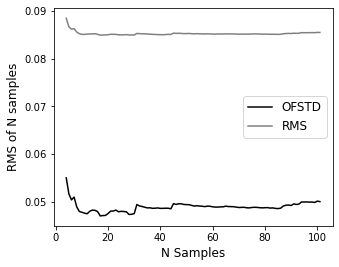

In [68]:
file_name = f"SWAG_tune_lr_ft24/128_0.0005_5e-3_0.0002_84_24_20/val_results_100/val_eval_swag-59_residual_summary_100.csv"
# colors = ["#9ebcda", "#8856a7"]
colors = ["k", "grey"]
# start at 3 samples
startN=3
df = pd.read_csv(file_name)
df = df.iloc[startN-1:]
fig, axes = plt.subplots(1, figsize=(5 ,4))
ln1 = axes.plot(np.arange(startN, len(df)+startN)+1, df.ens_of_std, color=colors[0], label="OFSTD")
ln2 = axes.plot(np.arange(startN, len(df)+startN)+1, df.ens_rms, color=colors[1], label="RMS")
axes.set_xlabel("N Samples", fontsize=12)
axes.set_ylabel("OFSTD of N samples", color=colors[0], fontsize=12)
axes.set_ylabel("RMS of N samples", x=1.1, fontsize=12) #, color=colors[1])
lns = ln1 + ln2 
labs = [l.get_label() for l in lns]
axes.legend(lns, labs, fontsize=12)